In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
# Download the required NLTK data

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Data-Sets/dataset_imdb.csv')

# Exploratory Data Analysis (EDA)

In [7]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [8]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
review       0
sentiment    0
dtype: int64


In [9]:
print("\nDuplicate rows:")
print(df.duplicated().sum())


Duplicate rows:
418


In [10]:
print("\nDataset summary:")
print(df.info())
print(df.describe())



Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000



Sentiment distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


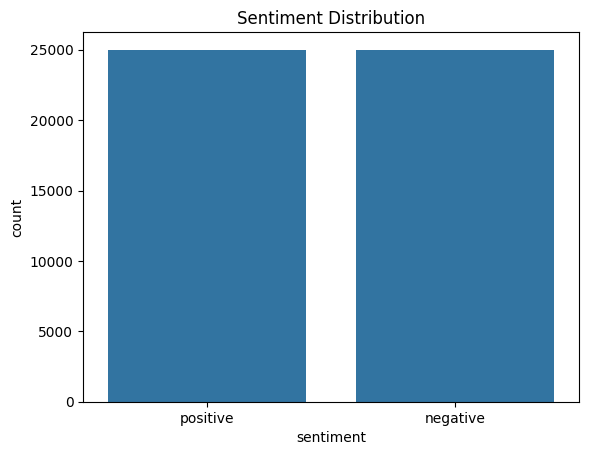

In [11]:
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

In [12]:
# Analyze review lengths
df['review_length'] = df['review'].apply(len)
print("\nReview length statistics:")
print(df['review_length'].describe())



Review length statistics:
count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64


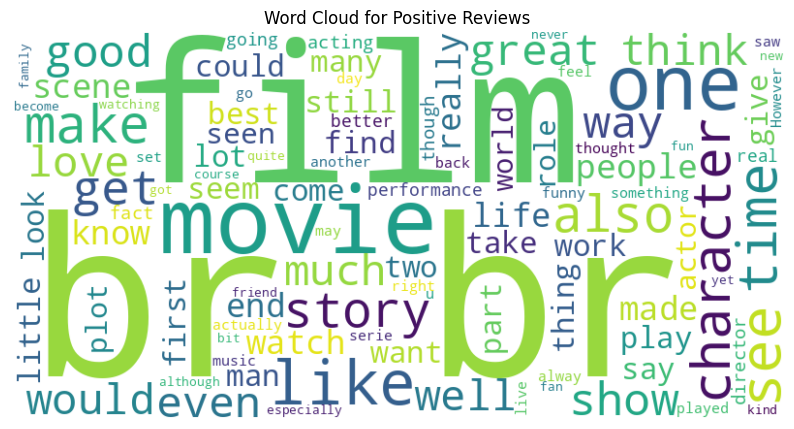

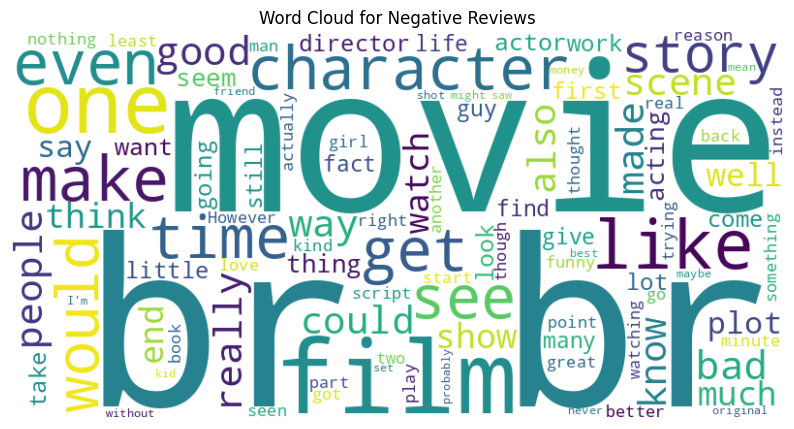

In [13]:

stop_words = set(stopwords.words('english'))
def generate_wordcloud(sentiment):
    text = " ".join(review for review in df[df['sentiment'] == sentiment]['review'])
    wordcloud = WordCloud(stopwords=stop_words, background_color="white", max_words=100, width=800, height=400).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment.capitalize()} Reviews")
    plt.show()

generate_wordcloud('positive')
generate_wordcloud('negative')

In [14]:
from collections import Counter
def most_common_words(sentiment):
    text = " ".join(review for review in df[df['sentiment'] == sentiment]['review'])
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(10)

print("\nMost common words in positive reviews:")
print(most_common_words('positive'))


Most common words in positive reviews:
[('br', 97954), ('film', 40765), ('movie', 36706), ('one', 26537), ('like', 17231), ('good', 14492), ('great', 12811), ('story', 12531), ('see', 11978), ('time', 11867)]


In [15]:
print("\nMost common words in negative reviews:")
print(most_common_words('negative'))



Most common words in negative reviews:
[('br', 103997), ('movie', 48364), ('film', 36154), ('one', 25291), ('like', 21952), ('would', 15224), ('even', 15205), ('good', 14275), ('bad', 14223), ('really', 12311)]


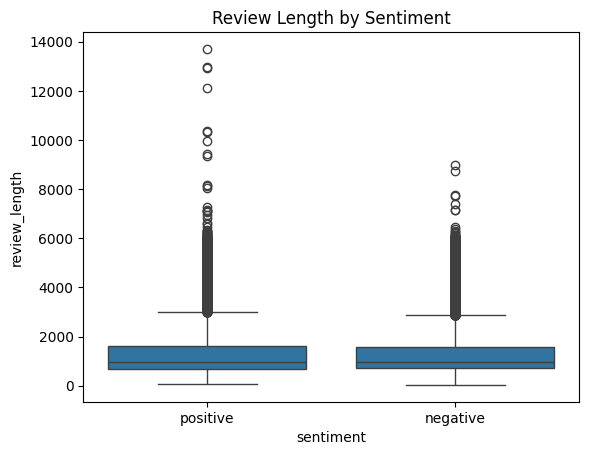

In [16]:
# Correlation between sentiment and review length
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title("Review Length by Sentiment")
plt.show()

# Data Preprocessing

In [17]:
# Text preprocessing function
def preprocess_review(review):
    """
    Preprocesses the input text by:
    1. Lowercasing
    2. Tokenizing
    3. Removing stopwords and non-alphanumeric tokens
    4. Lemmatizing
    """
    # Tokenize the text and convert to lowercase
    tokens = word_tokenize(review.lower())

    # Remove stopwords and non-alphanumeric tokens
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)
# Apply preprocessing
df['processed_review'] = df['review'].apply(preprocess_review)


In [18]:

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_review']).toarray()

# Encode sentiment labels
y = df['sentiment'].map({'positive': 1, 'negative': 0})

In [19]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
def train_and_evaluate_model(model, model_name):
    """
    Trains the given model and evaluates its performance.
    """
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}\n")

# Evaluate Naive Bayes
nb_model = MultinomialNB()
train_and_evaluate_model(nb_model, "Naive Bayes")

# Evaluate Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
train_and_evaluate_model(lr_model, "Logistic Regression")

Naive Bayes Performance:
Accuracy: 0.85
Precision: 0.85
Recall: 0.86
F1 Score: 0.85

Logistic Regression Performance:
Accuracy: 0.89
Precision: 0.88
Recall: 0.90
F1 Score: 0.89



In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D

# Deep Learning Preprocessing
vocab_size = 5000
X_train_dl = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=100)
X_test_dl = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=100)

# RNN/LSTM Model
def build_lstm_model():
    model = Sequential([
        Embedding(vocab_size, 128, input_length=100),
        LSTM(128, return_sequences=True),
        Dropout(0.2),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model = build_lstm_model()

lstm_model.fit(X_train_dl, y_train, epochs=3, batch_size=64, validation_data=(X_test_dl, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.5063 - loss: 0.6944 - val_accuracy: 0.4961 - val_loss: 0.6933
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.4996 - loss: 0.6932 - val_accuracy: 0.4961 - val_loss: 0.6932
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.4982 - loss: 0.6933 - val_accuracy: 0.4961 - val_loss: 0.6932


In [21]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
vocab_size = 10000  # Example vocabulary size; adjust based on your tokenizer
embedding_dim = 128  # Size of the embedding vector
max_len = 200  # Maximum length of sequences; adjust based on your dataset

# Define CNN Model
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN Model
cnn_history = cnn_model.fit(X_train, y_train, epochs=4, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the CNN Model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"CNN Accuracy: {cnn_accuracy:.2f}")

Epoch 1/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 77ms/step - accuracy: 0.5027 - loss: 0.6963 - val_accuracy: 0.5039 - val_loss: 0.6932
Epoch 2/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.4991 - loss: 0.6933 - val_accuracy: 0.4961 - val_loss: 0.6932
Epoch 3/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 73ms/step - accuracy: 0.5024 - loss: 0.6932 - val_accuracy: 0.4961 - val_loss: 0.6933
Epoch 4/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.4995 - loss: 0.6932 - val_accuracy: 0.4961 - val_loss: 0.6932
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4978 - loss: 0.6932
CNN Accuracy: 0.50


In [22]:
from sklearn.metrics import classification_report, accuracy_score

# Function to evaluate a model
def evaluate_model(model, X_test, y_test, model_name):
    # Predict probabilities
    y_pred_probs = model.predict(X_test)
    # Convert probabilities to binary predictions
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate precision, recall, and F1 score
    report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])

    print(f"\n--- {model_name} Performance ---")
    print(f"Accuracy: {accuracy:.2f}")
    print(report)

# Evaluate LSTM Model
evaluate_model(lstm_model, X_test, y_test, "LSTM")

# Evaluate RNN Model

# Evaluate CNN Model
evaluate_model(cnn_model, X_test, y_test, "CNN")

313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 126ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- LSTM Performance ---
Accuracy: 0.50
              precision    recall  f1-score   support

    Negative       0.50      1.00      0.66      4961
    Positive       0.00      0.00      0.00      5039

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step

--- CNN Performance ---
Accuracy: 0.50
              precision    recall  f1-score   support

    Negative       0.50      1.00      0.66      4961
    Positive       0.00      0.00      0.00      5039

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logestic Regression has the highest Accuracy

# Topic Modeling

In [23]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [24]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.85
Precision: 0.85
Recall: 0.86
F1 Score: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [28]:
# Step 10: Topic Modeling using Latent Dirichlet Allocation (LDA)
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Discover 5 topics
lda.fit(X_train)

# Step 11: Display top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic #{topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

print("\nTop Words for Each Topic:")
display_topics(lda, vectorizer.get_feature_names_out(), 10)



Top Words for Each Topic:

Topic #1:
song, musical, music, br, movie, dance, film, dancing, band, great

Topic #2:
br, film, one, movie, like, character, get, good, time, story

Topic #3:
movie, br, film, action, good, seagal, bad, batman, one, actor

Topic #4:
br, movie, film, like, one, bad, good, would, really, even

Topic #5:
br, film, movie, story, one, character, life, like, time, great


<ipython-input-29-fecdece517f2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


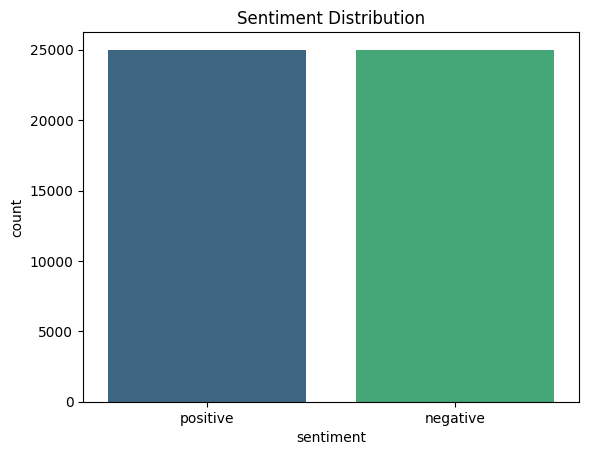

In [29]:

# Step 12: Visualizations
# Sentiment distribution visualization
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title("Sentiment Distribution")
plt.show()


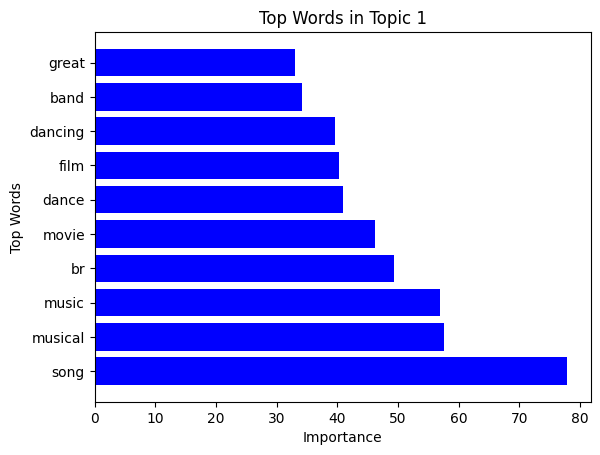

In [30]:

# Visualize the most important words for the first topic
topic_0 = lda.components_[0]
top_words_indices = topic_0.argsort()[-10:][::-1]  # Correct order for top words
top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_indices]
top_words_values = topic_0[top_words_indices]

plt.barh(top_words, top_words_values, color='blue')
plt.xlabel("Importance")
plt.ylabel("Top Words")
plt.title("Top Words in Topic 1")
plt.show()